In [108]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.util import view_as_blocks
from PIL import Image
import os

In [109]:
input_path = "./images"
output_path = "./output"

#Criação das pastas auxilires
if not os.path.exists(output_path):
    os.mkdir(output_path)

#Criação da pasta para os experimentos de alargamento
if not os.path.exists(output_path + "/alargamento"):
    os.mkdir(output_path + "/alargamento")


image = None

#leitura da imagem na pasta "/images"
for obj in os.listdir(input_path):
    image = io.imread(os.path.join(input_path, obj))
    

#função para plotar e salvar uma data imagem
def plot_and_save_image(image, text, min_level = 0, max_level = 255, show_axis = False, show_text = True):
    plt.figure(figsize = (5,5))
    if not show_axis:
        plt.axis("off")
    if show_text:
        plt.title(text)
    plt.imshow(image, cmap = 'gray', vmin = min_level, vmax = max_level)
    plt.savefig(os.path.join(output_path, text +".png"), cmap='gray', vmin=min_level, vmax=max_level, bbox_inches='tight', pad_inches=0)
    plt.show()

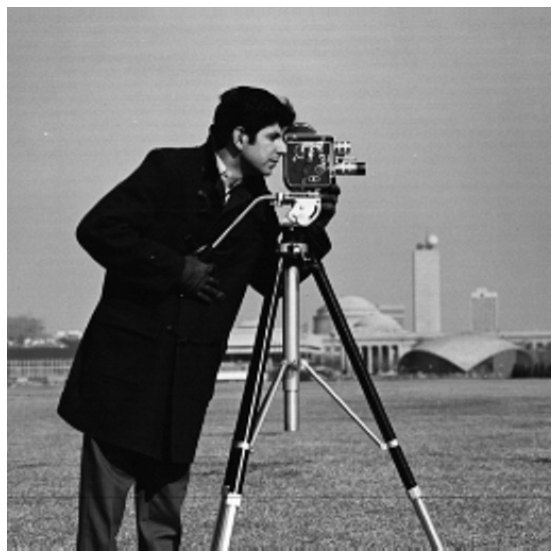

In [110]:
plt.figure(figsize = (10, 10))
plt.imshow(image, cmap = 'gray')
plt.axis("off")
plt.show()

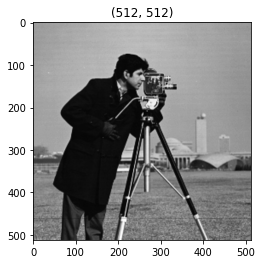

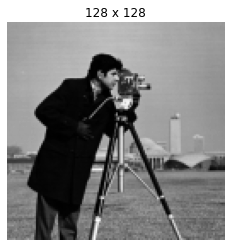

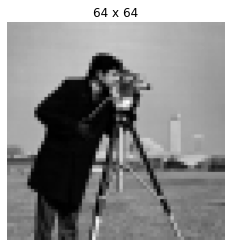

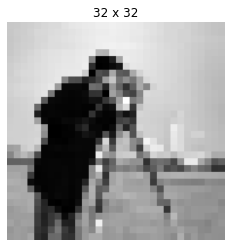

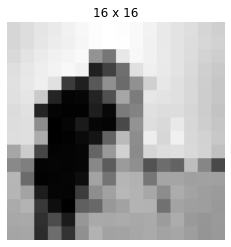

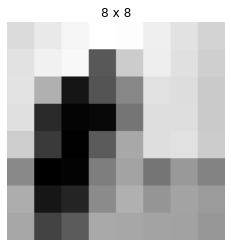

In [111]:
#Decrementa o valor da resolução de uma imagem. A resolução esperada possuirá a quantidade 
#de pixels da variavel block_size

def decrease_resolution(image, block_size = (512, 512)):
    #Armazena o tamanho original da imagem de entrada
    w, h = image.shape
    
    #Calcula o tamanho de cada bloco, onde cada bloco represetara um pixel da imagem
    block_w, block_h = w//block_size[0], h//block_size[1]
    
    #cria a matriz que armazenará o output
    output = np.zeros(image.shape)
    
    #itera sobre sobre os blocos da imagem original e os valores de cada bloco são substituidos pela média do bloco inteiro
    for lin in range(0, w, block_w):
        for col in range(0, h, block_h):
            output[lin:lin+block_w, col:col+block_h] = np.ones((block_w, block_h))*(image[lin:lin+block_w, col:col+block_h].mean())

    return output



#Mostra a imagem de referência
plt.imshow(image, cmap = 'gray')
plt.title(image.shape)
plt.show()
text = "cameraman_resolution"


#Passa pos diversos block_sizes
for block_size in [128, 64, 32, 16, 8]:
    img = decrease_resolution(image, (block_size, block_size))
    plt.imshow(img, cmap = 'gray')
    plt.axis("off")
    plt.title(f"{block_size} x {block_size}")
    plt.show()
    plot_and_save_image(img, text + f"{block_size}x{block_size}", show_text = False)

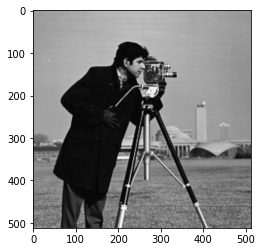

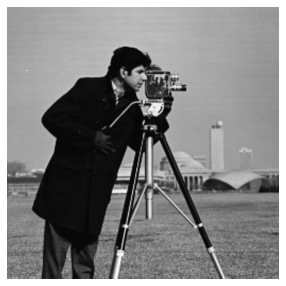

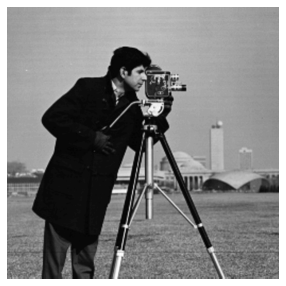

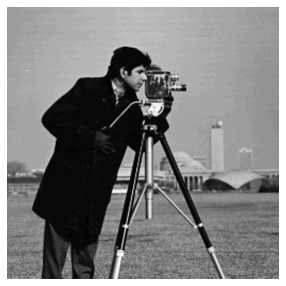

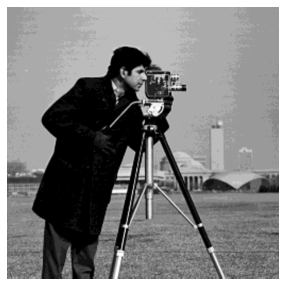

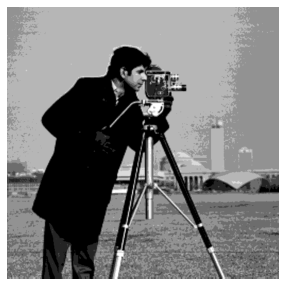

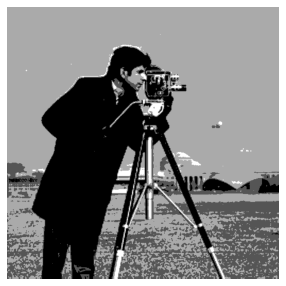

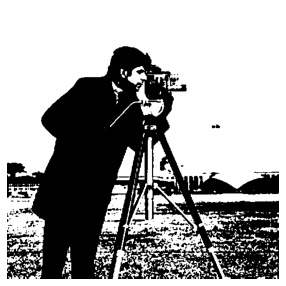

In [112]:
def quantize(image, level):
    
    #Como precisamos representar a imagem no intervalo entre 0 e level-1
    #pega-se a informação de quantos bits são necesários para representar a intensidade maxima
    bl = (level-1).bit_length()
    
    #realiza a operação de shift right para zerar os planos de bits
    output = image >> (8 - bl)
    return output


plt.imshow(image, cmap = 'gray')
plt.show()

levels = [256, 64, 32, 16, 8, 4, 2]
#Realiza o processo de quantização a partir de um array de niveis
text = "cameraman_quantize"
for level in levels:
    img = quantize(image, level)
    plot_and_save_image(img, text + f"{level}", max_level = level-1, show_text = False)

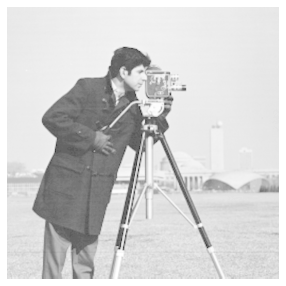

In [113]:
#Aplica a transformação logaritmica na imagem, com valor de c fixado para normalizar os valores entre [0-255]

def log_transform(image):
    c = 255/(np.log(255+1))
    return c*np.log(image + 1.)


text = "cameraman_log"
plot_and_save_image(log_transform(image), text, show_text = False)

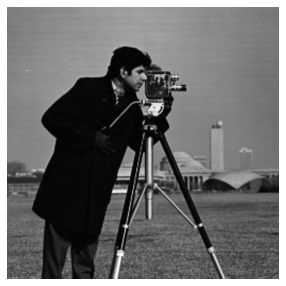

In [114]:
#Aplica a transformação exponencial na imagem, com valor de c fixado para normalizar os valores entre [0-255]

def exp_transform(image):
    c = 255./(np.e-1.)
    return  c*np.expm1(image)

img_norm = image.copy()/255.


#Plot da figura 6 do relatório
# plt.plot(exp_transform(np.linspace(0, 1, 256, endpoint = True)))
# plt.savefig("expplot.png")
# plt.show()

#Plot Inidividual da figura
# plt.figure(figsize = (5,5))
# plt.imshow(exp_transform(img_norm), cmap = 'gray', vmin = 0, vmax = 255)
# plt.axis("off")
# plt.show()

text = "cameraman_exp"
plot_and_save_image(exp_transform(img_norm), text, show_text = False)

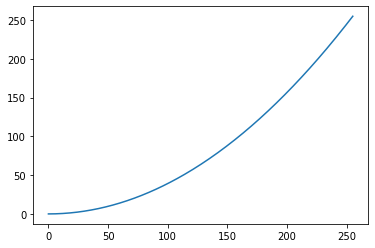

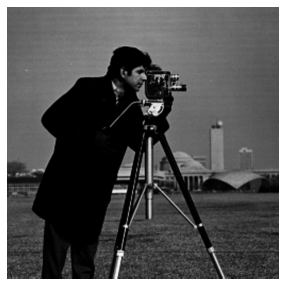

In [115]:
#Aplica a transformação quadrática na imagem, com valor de c fixado para normalizar os valores entre [0-255]

def square_transform(image):
    c = 255/1
    return c*np.square(image)

#Plot da figura 8 do relatório
# plt.plot(square_transform(np.linspace(0, 1, 256, endpoint = True)))
# plt.savefig("squareplot.png")
# plt.show()

text = "cameraman_squared"
plot_and_save_image(square_transform(img_norm), text, show_text = False)

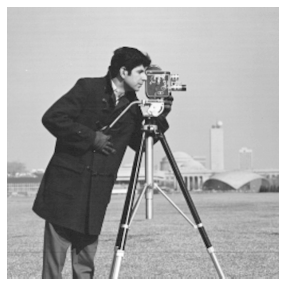

In [116]:
#Aplica a transformação raiz quadrada na imagem, com valor de c fixado para normalizar os valores entre [0-255]

def square_root_transform(image):
    c = 255
    return c*np.sqrt(image)


#Plot da figura 10 do relatório
# plt.figure(figsize = (5,5))
# plt.imshow(square_root_transform(img_norm), cmap = 'gray', vmin = 0, vmax = 255)
# plt.axis("off")
# plt.show()

# plt.plot(square_root_transform(np.linspace(0, 1, 256, endpoint = True)))
# plt.savefig("square_rootplot.png")
# plt.show()

text = "cameraman_square_root"
plot_and_save_image(square_root_transform(img_norm), text, show_text = False, min_level = 0, max_level = 255)

In [ ]:
def adjust_contrast(image, alpha = 1, beta = 1, gamma = 1, a = 20, b = 150):
    max_value = image.max()
    output = image.copy()
    
    aux = output[((0 <= image) & (image <= a))]
    #minimo entre o resultado da operação e o valor 255.
    output[ ( (0 <= image) & (image <= a) ) ] = np.fmin(np.around(alpha*aux), np.full(aux.shape, 255))

    aux = output[((a < image) & (image <= b))]
    #minimo entre o resultado da operação e o valor 255.
    output[ ( (a < image) & (image <= b) ) ] = np.fmin(np.around(beta*(aux-np.full(aux.shape, a)) 
                                                        + alpha*np.full(aux.shape, a))
                                                , np.full(aux.shape, 255))

    
    aux = output[((b < image) & (image <= max_value))]
    #minimo entre o resultado da operação e o valor 255.
    output[ ( (b < image) & (image <= max_value) ) ] = np.fmin(np.around(gamma*(aux-np.full(aux.shape, b))
                                                        + beta*(np.full(aux.shape, b) - np.full(aux.shape, a))
                                                        + alpha*(np.full(aux.shape, a)))
                                                        , np.full(aux.shape, 255))

    # Aquivalente à seguinte porção de código:
    
    # for lin in range(image.shape[0]):
    #     for col in range(image.shape[1]):
    #         if 0 <= output[lin][col] and output[lin][col] <= a:
    #             output[lin][col] = min(np.around(alpha*output[lin][col]), 255)
    #         elif a < output[lin][col] and output[lin][col] <= b:
    #             output[lin][col] = min(np.around(beta*(output[lin][col]-a) + alpha*a), 255)
    #         #assume-se que essa porcao do codigo so executará quando  b < output <= max_value
    #         else:
    #             output[lin][col] = min(gamma*(output[lin][col]-b) + beta*(b - a) + alpha*a, 255)
    
    return output


#Testar para vários parêmetros e seleciona apenas os melhores resultados

cnt = 0
for _a in [50, 100, 130]:
    for _b in [150, 170, 200]:
        for _alpha in [0.5, 1, 2]:
            for _beta in [0.5, 1, 2]:
                for _gamma in [0.5, 1, 2]:
                    plt.figure(figsize = (5,5))
                    img = adjust_contrast(image, alpha = _alpha, beta = _beta, gamma = _gamma, a = _a, b = _b)
                    plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
                    plt.title(f"Alpha:{_alpha} - Beta:{_beta} - Gamma:{_gamma} - a:{_a} - b:{_b}")
                    plt.axis("off")
                    plt.savefig("./output/alargamento/teste"+str(cnt)+".png", cmap = 'gray', pad_inches=0)
                    plt.show()
                    cnt += 1